# Time Series as Inputs to a Model
>  In this chapter, you will be introduced to classification problems and learn how to solve them using supervised learning techniques. And you’ll apply what you learn to a political dataset, where you classify the party affiliation of United States congressmen based on their voting records.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Python, Datacamp, Machine Learning]
- image: images/datacamp/1_supervised_learning_with_scikit_learn/2_regression.png

> Note: This is a summary of the course's chapter 2 exercises "Machine Learning for Time Series Data in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.xmargin'] = 0.05
plt.rcParams['axes.ymargin'] = 0.05
plt.style.use('default')
https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

## Classifying a time series


### Many repetitions of sounds


<div class=""><p>In this exercise, you'll start with perhaps the simplest classification technique: averaging across dimensions of a dataset and visually inspecting the result.</p>
<p>You'll use the heartbeat data described in the last chapter. Some recordings are <em>normal</em> heartbeat activity, while others are <em>abnormal</em> activity. Let's see if you can spot the difference.</p>
<p>Two DataFrames, <code>normal</code> and <code>abnormal</code>, each with the shape of <code>(n_times_points, n_audio_files)</code> containing the audio for several heartbeats are available in your workspace. Also, the sampling frequency is loaded into a variable called <code>sfreq</code>. A convenience plotting function <code>show_plot_and_make_titles()</code> is also available in your workspace.</p></div>

In [ ]:
normal = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/normal_heartbeat.csv', index_col=0)
abnormal = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/abnormal_heartbeat.csv', index_col=0)
sfreq = 2205

In [ ]:
def show_plot_and_make_titles():
   axs[0, 0].set(title="Normal Heartbeats")
   axs[0, 1].set(title="Abnormal Heartbeats")
   plt.tight_layout()
   plt.show()

Instructions
<ul>
<li>First, create the time array for these audio files (all audios are the same length).</li>
<li>Then, stack the values of the two DataFrames together (<code>normal</code> and <code>abnormal</code>, in that order) so that you have a single array of shape <code>(n_audio_files, n_times_points)</code>.</li>
<li>Finally, use the code provided to loop through each list item / axis, and plot the audio over time in the corresponding axis object.</li>
<li>You'll plot normal heartbeats in the left column, and abnormal ones in the right column</li>
</ul>

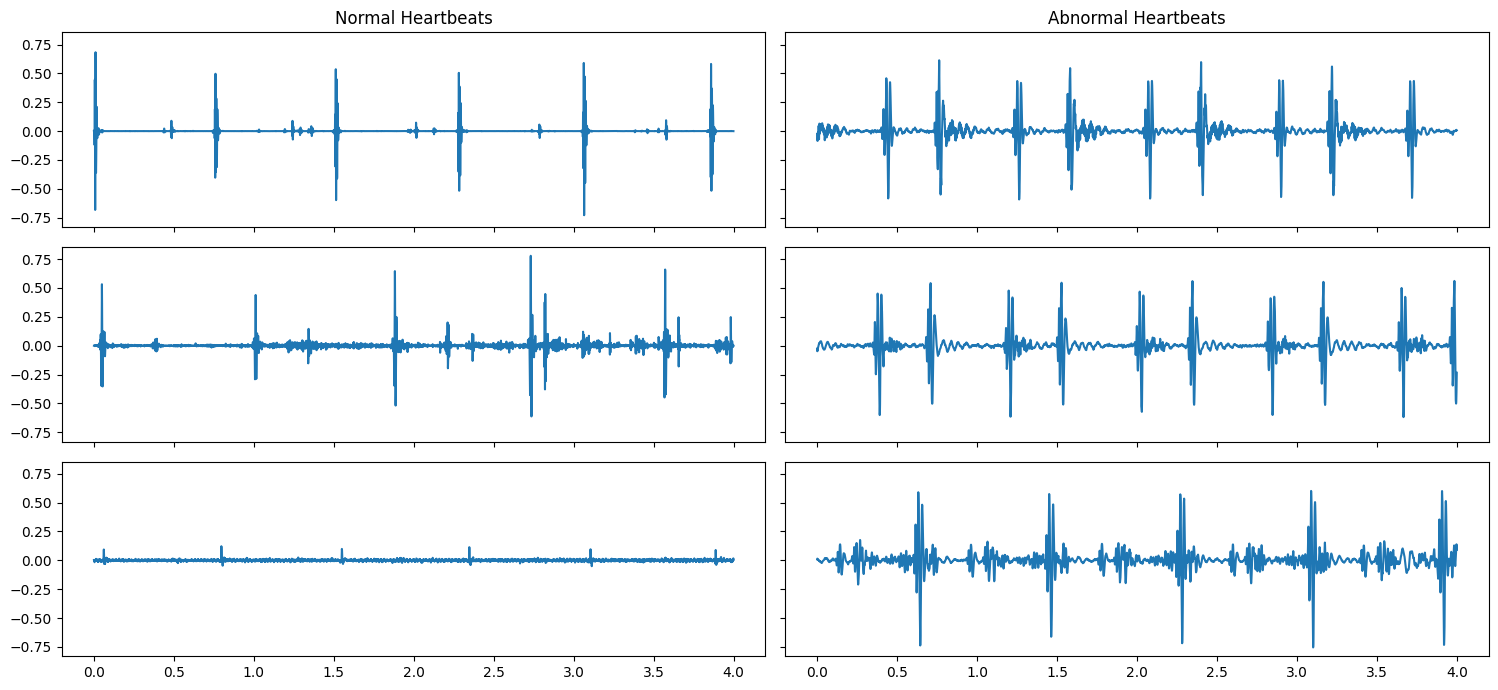

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# Calculate the time array
time = np.arange(len(normal)) / sfreq

# Stack the normal/abnormal audio so you can loop and plot
stacked_audio = np.hstack([normal, abnormal]).T

# Loop through each audio file / ax object and plot
# .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)
show_plot_and_make_titles()

**As you can see there is a lot of variability in the raw data, let's see if you can average out some of that noise to notice a difference.**

### Invariance in time


<div class=""><p>While you should always start by visualizing your raw data, this is often uninformative when it comes to discriminating between two classes of data points. Data is usually noisy or exhibits complex patterns that aren't discoverable by the naked eye.</p>
<p>Another common technique to find simple differences between two sets of data is to <em>average</em> across multiple instances of the same class. This <em>may</em> remove noise and reveal underlying patterns (or, it may not).</p>
<p>In this exercise, you'll average across many instances of each class of heartbeat sound. </p>
<p>The two DataFrames (<code>normal</code> and <code>abnormal</code>) and the time array (<code>time</code>) from the previous exercise are available in your workspace.</p></div>

Instructions
<ul>
<li>Average across the audio files contained in <code>normal</code> and <code>abnormal</code>, leaving the time dimension. </li>
<li>Visualize these averages over time.</li>
</ul>

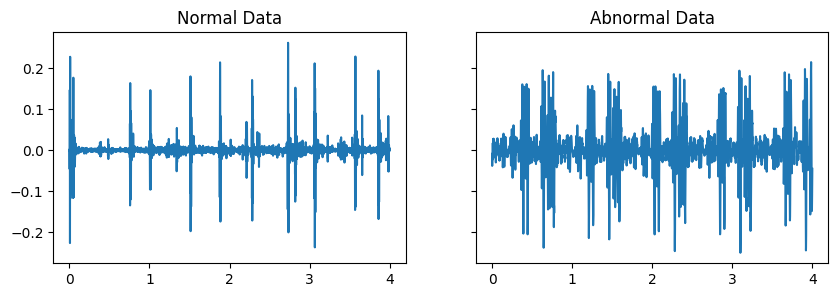

In [ ]:
# Average across the audio files of each DataFrame
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)

# Plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax1.plot(time, mean_normal)
ax1.set(title="Normal Data")
ax2.plot(time, mean_abnormal)
ax2.set(title="Abnormal Data")
plt.show()

**Do you see a noticeable difference between the two? Maybe, but it's quite noisy. Let's see how you can dig into the data a bit further.**

### Build a classification model <<< (acho melhor criar um df de X_train)


In [ ]:
https://campus.datacamp.com/courses/machine-learning-for-time-series-data-in-python/time-series-as-inputs-to-a-model?ex=4

<div class=""><p>While eye-balling differences is a useful way to gain an intuition for the data, let's see if you can operationalize things with a model. In this exercise, you will use each repetition as a
datapoint, and each moment in time as a feature to fit a classifier that attempts to predict abnormal vs. normal heartbeats using <em>only the raw data</em>. </p>
<p>We've split the two DataFrames (<code>normal</code> and <code>abnormal</code>) into <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, and <code>y_test</code>.</p></div>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
normal_train_idx = np.random.choice(normal.shape[1], size=22, replace=False).tolist()
normal_test_idx = list(set(np.arange(normal.shape[1]).tolist()) - set(normal_train_idx))

abnormal_train_idx = np.random.choice(abnormal.shape[1], size=20, replace=False).tolist()
abnormal_test_idx = list(set(np.arange(abnormal.shape[1]).tolist()) - set(abnormal_train_idx))

X_train = pd.concat([normal.iloc[:, normal_train_idx], 
                     abnormal.iloc[:, abnormal_train_idx]], axis=1).to_numpy().T
X_test = pd.concat([normal.iloc[:, normal_test_idx], 
                    abnormal.iloc[:, abnormal_test_idx]], axis=1).to_numpy().T

y_train = np.array(['normal'] * len(normal_train_idx) + ['abnormal'] * len(abnormal_train_idx))
y_test = np.array(['normal'] * len(normal_test_idx) + ['abnormal'] * len(abnormal_test_idx))

ValueError: ignored

Instructions
<ul>
<li>Create an instance of the Linear SVC model and fit the model using the training data.</li>
<li>Use the testing data to generate predictions with the model.</li>
<li>Score the model using the provided code.</li>
</ul>

In [ ]:
from sklearn.svm import LinearSVC

# Initialize and fit the model
model = LinearSVC()
model.fit(X_train, y_train)

# Generate predictions and score them manually
predictions = model.predict(X_test)
print(sum(predictions == y_test.squeeze()) / len(y_test))

**Note that your predictions didn't do so well. That's because the features you're using as inputs to the model (raw data) aren't very good at differentiating classes. Next, you'll explore how to calculate some more complex features that may improve the results.**

## Improving features for classification


### Calculating the envelope of sound

<div class=""><p>One of the ways you can improve the features available to your model is to remove
some of the noise present in the data. In audio data, a common way to do this is to
<em>smooth</em> the data and then <em>rectify</em> it so that the total amount of sound
energy over time is more distinguishable. You'll do this in the current exercise.</p>
<p>A heartbeat file is available in the variable <code>audio</code>.</p></div>

In [ ]:
audio = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/df_audio_sample.csv', index_col=0)
audio = audio.squeeze()

Instructions 1/3
<p>Visualize the raw audio you'll use to calculate the envelope.</p>

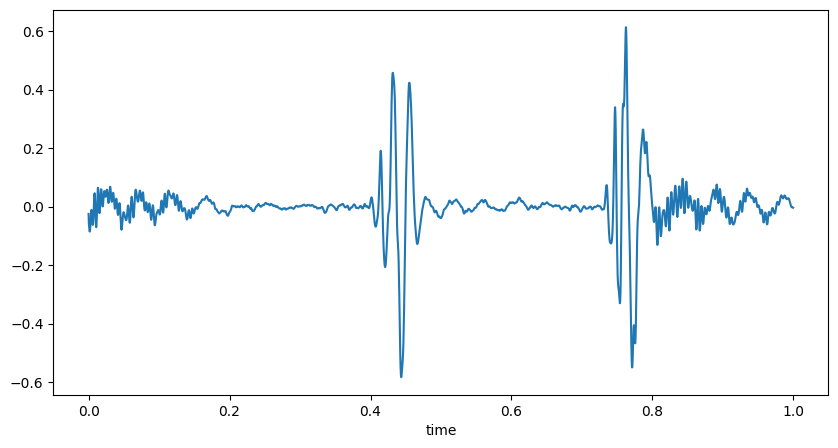

In [ ]:
# Plot the raw data first
audio.plot(figsize=(10, 5))
plt.show()

Instructions 2/3
<ul>
<li>Rectify the audio. </li>
<li>Plot the result.</li>
</ul>

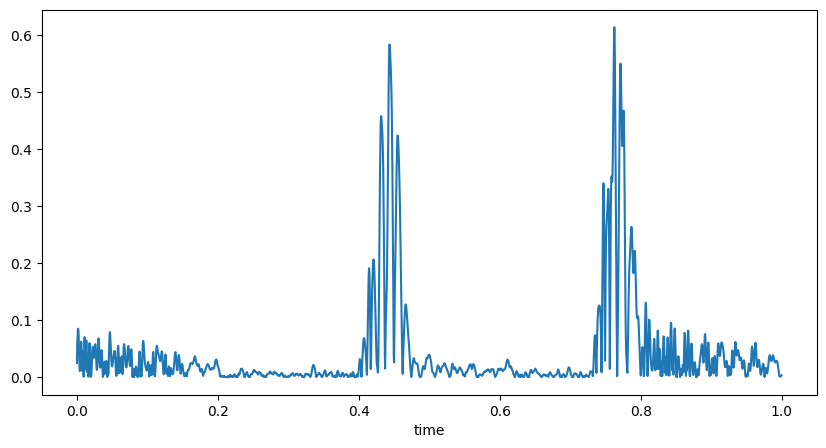

In [ ]:
# Rectify the audio signal
audio_rectified = audio.apply(np.abs)

# Plot the result
audio_rectified.plot(figsize=(10, 5))
plt.show()

Instructions 3/3
<ul>
<li>Smooth the audio file by applying a rolling mean.  </li>
<li>Plot the result.</li>
</ul>

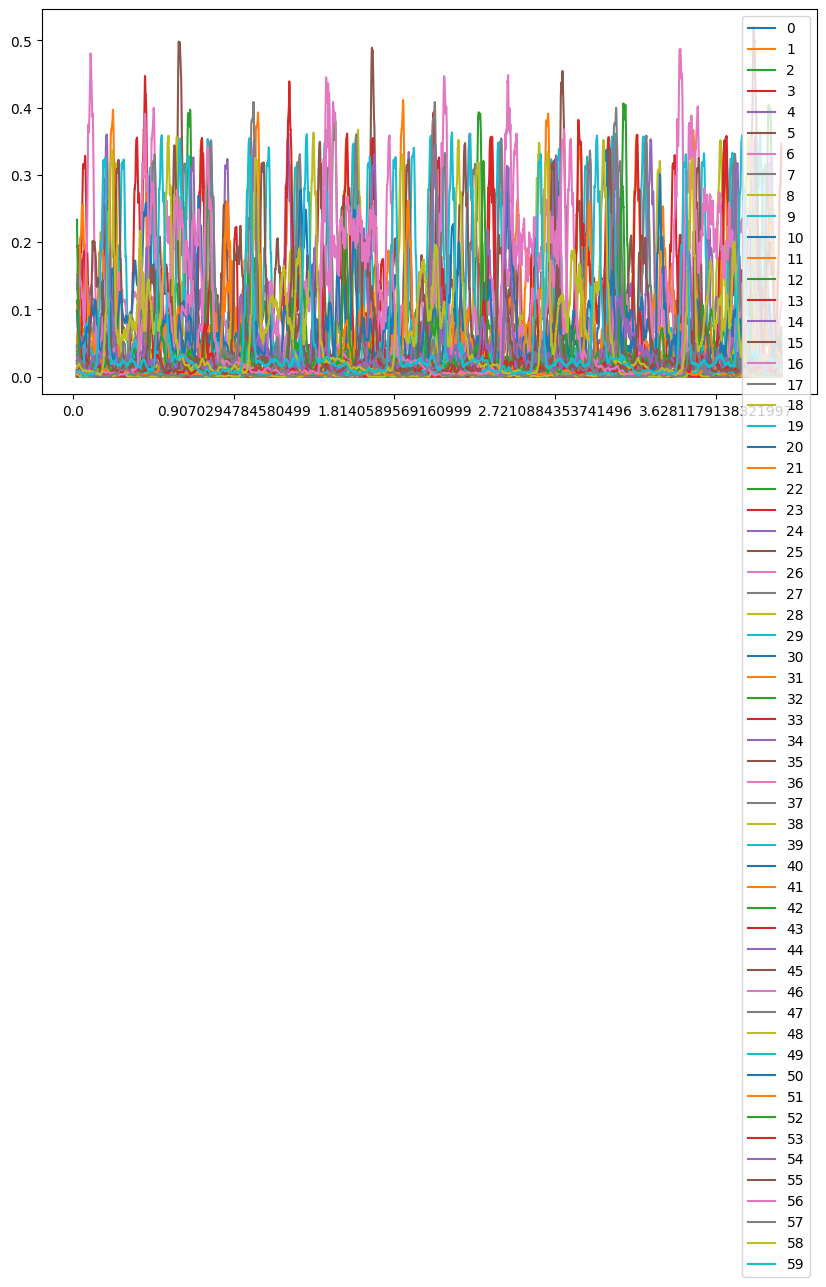

In [ ]:
# Smooth by applying a rolling mean
audio_rectified_smooth = audio_rectified.rolling (50).mean()

# Plot the result
audio_rectified_smooth.plot(figsize=(10, 5))
plt.show()

**By calculating the envelope of each sound and smoothing it, you've eliminated much of the noise and have a cleaner signal to tell you when a heartbeat is happening.**

### Calculating features from the envelope


<div class=""><p>Now that you've removed some of the noisier fluctuations in the audio, let's see if this
improves your ability to classify. </p>
<p><code>audio_rectified_smooth</code> from the previous exercise is available in your workspace.</p></div>

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/audio2_samples.csv', index_col=0)

In [ ]:
from sklearn.svm import LinearSVC
# Initialize and fit the model
model = LinearSVC()

In [ ]:
audio = df[:-1].astype(np.float64)
audio_rectified = audio.apply(np.abs)
audio_rectified_smooth = audio_rectified.rolling (50).mean()
labels = df[-1:].values[0]

Instructions
<ul>
<li>Calculate the mean, standard deviation, and maximum value for each heartbeat sound.</li>
<li>Column stack these stats in the same order. </li>
<li>Use cross-validation to fit a model on each CV iteration.</li>
</ul>

In [ ]:
# Calculate stats
means = np.mean(audio_rectified_smooth, axis=0)
stds = np.std(audio_rectified_smooth, axis=0)
maxs = np.max(audio_rectified_smooth, axis=0)

# Create the X and y arrays
X = np.column_stack([means, stds, maxs])
y = labels #.reshape([-1, 1])  #old_version

# Fit the model and score on testing data
from sklearn.model_selection import cross_val_score
#train_y.values.ravel()
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

0.7166666666666667


**This model is both simpler (only 3 features) and more understandable (features are simple summary statistics of the data).**

### Derivative features: The tempogram


<div class=""><p>One benefit of cleaning up your data is that it lets you compute more sophisticated
features. For example, the envelope calculation you performed is a common technique
in computing <strong>tempo</strong> and <strong>rhythm</strong> features. In this exercise, you'll use <code>librosa</code>
to compute some tempo and rhythm features for heartbeat data, and fit a model once more.</p>
<p>Note that <code>librosa</code> functions tend to only operate on <strong>numpy arrays</strong> instead of DataFrames,
so we'll access our Pandas data as a Numpy array with the <code>.values</code> attribute.</p></div>

In [ ]:
import librosa as lr

Instructions 1/2
<ul>
<li>Use <code>librosa</code> to calculate a tempogram of each heartbeat audio. </li>
<li>Calculate the mean, standard deviation, and maximum of each tempogram (this time using DataFrame methods)</li>
</ul>

In [ ]:
# Calculate the tempo of the sounds
tempos = []
for col, i_audio in audio.items():
    tempos.append(lr.beat.tempo(i_audio.values, sr=sfreq, hop_length=2**6, aggregate=None))

# Convert the list to an array so you can manipulate it more easily
tempos = np.array(tempos)

# Calculate statistics of each tempo
tempos_mean = tempos.mean(axis=-1)
tempos_std = tempos.std(axis=-1)
tempos_max = tempos.max(axis=-1)

/usr/local/lib/python3.6/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


Instructions 2/2
<ul>
<li>Column stack these tempo features (mean, standard deviation, and maximum) in the same order. </li>
<li>Score the classifier with cross-validation.</li>
</ul>

In [ ]:
# Create the X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_std, tempos_max])
y = labels#.reshape([-1, 1])

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

0.5166666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

**Note that your predictive power may not have gone up (because this dataset is quite small), but you now have a more rich feature representation of audio that your model can use!**

## The spectrogram


### Spectrograms of heartbeat audio


<div class=""><p>Spectral engineering is one of the most common techniques in machine learning for time series data. The first step
in this process is to calculate a <strong>spectrogram</strong> of sound. This describes what spectral content (e.g., low and high pitches)
are present in the sound over time. In this exercise, you'll calculate a spectrogram of a heartbeat audio file.</p>
<p>We've loaded a single heartbeat sound in the variable <code>audio</code>.</p></div>

In [ ]:
audio = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/audio_spec.csv') 
audio = audio.values.ravel()

Instructions 1/2
<ul>
<li>Import the short-time fourier transform (<code>stft</code>) function from <code>librosa.core</code>.  </li>
<li>Calculate the spectral content (using the short-time fourier transform function) of <code>audio</code>.</li>
</ul>

In [ ]:
# Import the stft function
from librosa.core import stft

# Prepare the STFT
HOP_LENGTH = 2**4
spec = stft(audio, hop_length=HOP_LENGTH, n_fft=2**7)

Instructions 2/2
<ul>
<li>Convert the spectogram (<code>spec</code>) to decibels. </li>
<li>Visualize the spectogram.</li>
</ul>

/usr/local/lib/python3.6/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


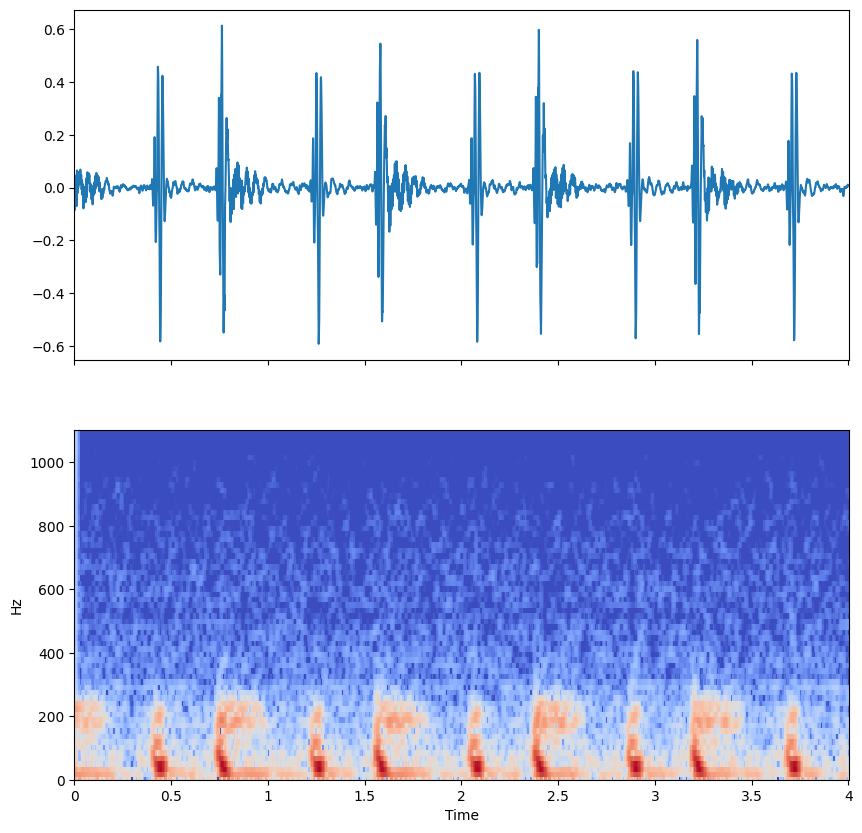

In [ ]:
from librosa.core import amplitude_to_db
from librosa.display import specshow

# Convert into decibels
spec_db = amplitude_to_db(spec)

# Compare the raw audio to the spectrogram of the audio
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].plot(time, audio)
specshow(spec_db, sr=sfreq, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
plt.show()

**Do you notice that the heartbeats come in pairs, as seen by the vertical lines in the spectrogram?**

### Engineering spectral features


<div class=""><p>As you can probably tell, there is a lot more information in a spectrogram compared to a raw audio file. By computing the
spectral features, you have a much better idea of what's going on. As such, there are all kinds of spectral features that
you can compute using the spectrogram as a base. In this exercise, you'll look at a few of these features.</p>
<p>The spectogram <code>spec</code> from the previous exercise is available in your workspace.</p></div>

In [ ]:
#@title ⠀ { display-mode: "form" }
spec = np.array(np.abs(spec))
times_spec = np.array([ 0.        ,  0.00725624,  0.01451247,  0.02176871,  0.02902494,
        0.03628118,  0.04353741,  0.05079365,  0.05804989,  0.06530612,
        0.07256236,  0.07981859,  0.08707483,  0.09433107,  0.1015873 ,
        0.10884354,  0.11609977,  0.12335601,  0.13061224,  0.13786848,
        0.14512472,  0.15238095,  0.15963719,  0.16689342,  0.17414966,
        0.1814059 ,  0.18866213,  0.19591837,  0.2031746 ,  0.21043084,
        0.21768707,  0.22494331,  0.23219955,  0.23945578,  0.24671202,
        0.25396825,  0.26122449,  0.26848073,  0.27573696,  0.2829932 ,
        0.29024943,  0.29750567,  0.3047619 ,  0.31201814,  0.31927438,
        0.32653061,  0.33378685,  0.34104308,  0.34829932,  0.35555556,
        0.36281179,  0.37006803,  0.37732426,  0.3845805 ,  0.39183673,
        0.39909297,  0.40634921,  0.41360544,  0.42086168,  0.42811791,
        0.43537415,  0.44263039,  0.44988662,  0.45714286,  0.46439909,
        0.47165533,  0.47891156,  0.4861678 ,  0.49342404,  0.50068027,
        0.50793651,  0.51519274,  0.52244898,  0.52970522,  0.53696145,
        0.54421769,  0.55147392,  0.55873016,  0.56598639,  0.57324263,
        0.58049887,  0.5877551 ,  0.59501134,  0.60226757,  0.60952381,
        0.61678005,  0.62403628,  0.63129252,  0.63854875,  0.64580499,
        0.65306122,  0.66031746,  0.6675737 ,  0.67482993,  0.68208617,
        0.6893424 ,  0.69659864,  0.70385488,  0.71111111,  0.71836735,
        0.72562358,  0.73287982,  0.74013605,  0.74739229,  0.75464853,
        0.76190476,  0.769161  ,  0.77641723,  0.78367347,  0.79092971,
        0.79818594,  0.80544218,  0.81269841,  0.81995465,  0.82721088,
        0.83446712,  0.84172336,  0.84897959,  0.85623583,  0.86349206,
        0.8707483 ,  0.87800454,  0.88526077,  0.89251701,  0.89977324,
        0.90702948,  0.91428571,  0.92154195,  0.92879819,  0.93605442,
        0.94331066,  0.95056689,  0.95782313,  0.96507937,  0.9723356 ,
        0.97959184,  0.98684807,  0.99410431,  1.00136054,  1.00861678,
        1.01587302,  1.02312925,  1.03038549,  1.03764172,  1.04489796,
        1.0521542 ,  1.05941043,  1.06666667,  1.0739229 ,  1.08117914,
        1.08843537,  1.09569161,  1.10294785,  1.11020408,  1.11746032,
        1.12471655,  1.13197279,  1.13922902,  1.14648526,  1.1537415 ,
        1.16099773,  1.16825397,  1.1755102 ,  1.18276644,  1.19002268,
        1.19727891,  1.20453515,  1.21179138,  1.21904762,  1.22630385,
        1.23356009,  1.24081633,  1.24807256,  1.2553288 ,  1.26258503,
        1.26984127,  1.27709751,  1.28435374,  1.29160998,  1.29886621,
        1.30612245,  1.31337868,  1.32063492,  1.32789116,  1.33514739,
        1.34240363,  1.34965986,  1.3569161 ,  1.36417234,  1.37142857,
        1.37868481,  1.38594104,  1.39319728,  1.40045351,  1.40770975,
        1.41496599,  1.42222222,  1.42947846,  1.43673469,  1.44399093,
        1.45124717,  1.4585034 ,  1.46575964,  1.47301587,  1.48027211,
        1.48752834,  1.49478458,  1.50204082,  1.50929705,  1.51655329,
        1.52380952,  1.53106576,  1.538322  ,  1.54557823,  1.55283447,
        1.5600907 ,  1.56734694,  1.57460317,  1.58185941,  1.58911565,
        1.59637188,  1.60362812,  1.61088435,  1.61814059,  1.62539683,
        1.63265306,  1.6399093 ,  1.64716553,  1.65442177,  1.661678  ,
        1.66893424,  1.67619048,  1.68344671,  1.69070295,  1.69795918,
        1.70521542,  1.71247166,  1.71972789,  1.72698413,  1.73424036,
        1.7414966 ,  1.74875283,  1.75600907,  1.76326531,  1.77052154,
        1.77777778,  1.78503401,  1.79229025,  1.79954649,  1.80680272,
        1.81405896,  1.82131519,  1.82857143,  1.83582766,  1.8430839 ,
        1.85034014,  1.85759637,  1.86485261,  1.87210884,  1.87936508,
        1.88662132,  1.89387755,  1.90113379,  1.90839002,  1.91564626,
        1.92290249,  1.93015873,  1.93741497,  1.9446712 ,  1.95192744,
        1.95918367,  1.96643991,  1.97369615,  1.98095238,  1.98820862,
        1.99546485,  2.00272109,  2.00997732,  2.01723356,  2.0244898 ,
        2.03174603,  2.03900227,  2.0462585 ,  2.05351474,  2.06077098,
        2.06802721,  2.07528345,  2.08253968,  2.08979592,  2.09705215,
        2.10430839,  2.11156463,  2.11882086,  2.1260771 ,  2.13333333,
        2.14058957,  2.1478458 ,  2.15510204,  2.16235828,  2.16961451,
        2.17687075,  2.18412698,  2.19138322,  2.19863946,  2.20589569,
        2.21315193,  2.22040816,  2.2276644 ,  2.23492063,  2.24217687,
        2.24943311,  2.25668934,  2.26394558,  2.27120181,  2.27845805,
        2.28571429,  2.29297052,  2.30022676,  2.30748299,  2.31473923,
        2.32199546,  2.3292517 ,  2.33650794,  2.34376417,  2.35102041,
        2.35827664,  2.36553288,  2.37278912,  2.38004535,  2.38730159,
        2.39455782,  2.40181406,  2.40907029,  2.41632653,  2.42358277,
        2.430839  ,  2.43809524,  2.44535147,  2.45260771,  2.45986395,
        2.46712018,  2.47437642,  2.48163265,  2.48888889,  2.49614512,
        2.50340136,  2.5106576 ,  2.51791383,  2.52517007,  2.5324263 ,
        2.53968254,  2.54693878,  2.55419501,  2.56145125,  2.56870748,
        2.57596372,  2.58321995,  2.59047619,  2.59773243,  2.60498866,
        2.6122449 ,  2.61950113,  2.62675737,  2.63401361,  2.64126984,
        2.64852608,  2.65578231,  2.66303855,  2.67029478,  2.67755102,
        2.68480726,  2.69206349,  2.69931973,  2.70657596,  2.7138322 ,
        2.72108844,  2.72834467,  2.73560091,  2.74285714,  2.75011338,
        2.75736961,  2.76462585,  2.77188209,  2.77913832,  2.78639456,
        2.79365079,  2.80090703,  2.80816327,  2.8154195 ,  2.82267574,
        2.82993197,  2.83718821,  2.84444444,  2.85170068,  2.85895692,
        2.86621315,  2.87346939,  2.88072562,  2.88798186,  2.8952381 ,
        2.90249433,  2.90975057,  2.9170068 ,  2.92426304,  2.93151927,
        2.93877551,  2.94603175,  2.95328798,  2.96054422,  2.96780045,
        2.97505669,  2.98231293,  2.98956916,  2.9968254 ,  3.00408163,
        3.01133787,  3.0185941 ,  3.02585034,  3.03310658,  3.04036281,
        3.04761905,  3.05487528,  3.06213152,  3.06938776,  3.07664399,
        3.08390023,  3.09115646,  3.0984127 ,  3.10566893,  3.11292517,
        3.12018141,  3.12743764,  3.13469388,  3.14195011,  3.14920635,
        3.15646259,  3.16371882,  3.17097506,  3.17823129,  3.18548753,
        3.19274376,  3.2       ,  3.20725624,  3.21451247,  3.22176871,
        3.22902494,  3.23628118,  3.24353741,  3.25079365,  3.25804989,
        3.26530612,  3.27256236,  3.27981859,  3.28707483,  3.29433107,
        3.3015873 ,  3.30884354,  3.31609977,  3.32335601,  3.33061224,
        3.33786848,  3.34512472,  3.35238095,  3.35963719,  3.36689342,
        3.37414966,  3.3814059 ,  3.38866213,  3.39591837,  3.4031746 ,
        3.41043084,  3.41768707,  3.42494331,  3.43219955,  3.43945578,
        3.44671202,  3.45396825,  3.46122449,  3.46848073,  3.47573696,
        3.4829932 ,  3.49024943,  3.49750567,  3.5047619 ,  3.51201814,
        3.51927438,  3.52653061,  3.53378685,  3.54104308,  3.54829932,
        3.55555556,  3.56281179,  3.57006803,  3.57732426,  3.5845805 ,
        3.59183673,  3.59909297,  3.60634921,  3.61360544,  3.62086168,
        3.62811791,  3.63537415,  3.64263039,  3.64988662,  3.65714286,
        3.66439909,  3.67165533,  3.67891156,  3.6861678 ,  3.69342404,
        3.70068027,  3.70793651,  3.71519274,  3.72244898,  3.72970522,
        3.73696145,  3.74421769,  3.75147392,  3.75873016,  3.76598639,
        3.77324263,  3.78049887,  3.7877551 ,  3.79501134,  3.80226757,
        3.80952381,  3.81678005,  3.82403628,  3.83129252,  3.83854875,
        3.84580499,  3.85306122,  3.86031746,  3.8675737 ,  3.87482993,
        3.88208617,  3.8893424 ,  3.89659864,  3.90385488,  3.91111111,
        3.91836735,  3.92562358,  3.93287982,  3.94013605,  3.94739229,
        3.95464853,  3.96190476,  3.969161  ,  3.97641723,  3.98367347,
        3.99092971,  3.99818594])

Instructions 1/2
<p>Calculate the <strong>spectral bandwidth</strong> as well as the <strong>spectral centroid</strong> of the spectrogram by using functions in <code>librosa.feature</code>.</p>

In [ ]:
import librosa as lr

# Calculate the spectral centroid and bandwidth for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=spec)[0]
centroids = lr.feature.spectral_centroid(S=spec)[0]

Instructions 2/2

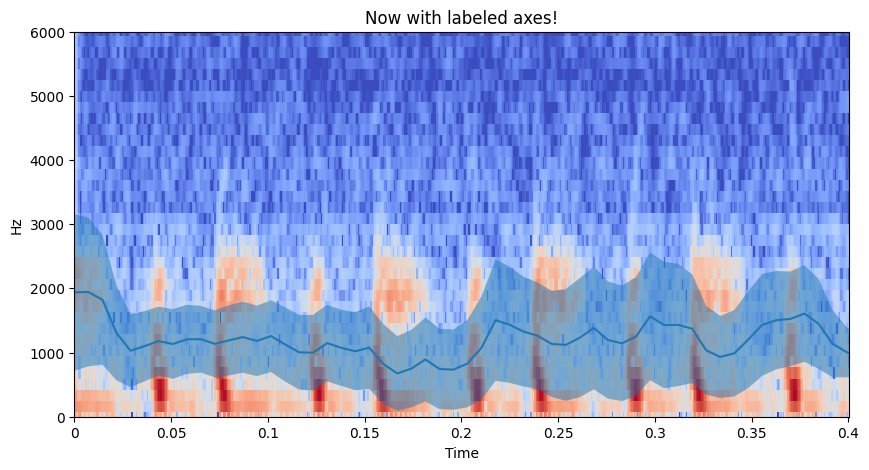

In [ ]:
spec_db = amplitude_to_db(spec)

fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(spec_db, x_axis='time', y_axis='linear', hop_length=HOP_LENGTH) #, y_axis='linear', ax=ax cqt_hz
ax.set(title='Now with labeled axes!')
ax.plot(times_spec, centroids)
ax.fill_between(times_spec, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
ax.set(ylim=[None, 6000])
plt.show()

**As you can see, the spectral centroid and bandwidth characterize the spectral content in each sound over time. They give us a summary of the spectral content that we can use in a classifier.**

### Combining many features in a classifier


<div class=""><p>You've spent this lesson engineering many features from the audio data - some contain information about
how the audio changes in time, others contain information about the spectral content that is present. </p>
<p>The
beauty of machine learning is that it can handle all of these features at the same time. If there is different
information present in each feature, it should improve the classifier's ability to distinguish the types of
audio. Note that this often requires more advanced techniques such as regularization, which we'll cover in the
next chapter.</p>
<p>For the final exercise in the chapter, we've loaded many of the features that you calculated before. Combine all of them into
an array that can be fed into the classifier, and see how it does.</p></div>

In [ ]:
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/data.npz

--2021-01-28 20:22:40--  https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/data.npz
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/data.npz [following]
--2021-01-28 20:22:41--  https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/data.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Leng

In [ ]:
from numpy import load
arr_test = load('data.npz')
spectrograms = list(arr_test['arr_0'])

In [ ]:
audio = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/audio_spec.csv') 
#audio = audio.values.ravel()

In [ ]:
audio

,0
0,-0.024684
1,-0.060429
2,-0.070080
3,-0.084212
4,-0.085111
...,...
8815,0.010513
8816,0.009675
8817,0.007957
8818,0.006445


In [ ]:
# Calculate the tempo of the sounds
tempos = []
for col, i_audio in audio.items():
    tempos.append(lr.beat.tempo(i_audio.values, sr=sfreq, hop_length=2**6, aggregate=None))

# Convert the list to an array so you can manipulate it more easily
tempos = np.array(tempos)

# Calculate statistics of each tempo
tempo_mean = tempos.mean(axis=-1)
tempo_std = tempos.std(axis=-1)
tempo_max = tempos.max(axis=-1)

AttributeError: ignored

Instructions 1/2
<p>Loop through each spectrogram, calculating the mean spectral bandwidth and centroid of each.</p>

In [ ]:
# Loop through each spectrogram
bandwidths = []
centroids = []

for spec in spectrograms:
    # Calculate the mean spectral bandwidth
    this_mean_bandwidth = np.mean(lr.feature.spectral_bandwidth(S=spec))
    # Calculate the mean spectral centroid
    this_mean_centroid = np.mean(lr.feature.spectral_centroid(S=spec))
    # Collect the values
    bandwidths.append(this_mean_bandwidth)  
    centroids.append(this_mean_centroid)

Instructions 2/2
<ul>
<li>Column stack all the features to create the array <code>X</code>. </li>
<li>Score the classifier with cross-validation.</li>
</ul>

In [ ]:
# Create X and y arrays
X = np.column_stack([means, stds, maxs, tempo_mean, tempo_max, tempo_std, bandwidths, centroids])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

ValueError: ignored

**You calculated many different features of the audio, and combined each of them under the assumption that they provide independent information that can be used in classification. You may have noticed that the accuracy of your models varied a lot when using different set of features. This chapter was focused on creating new "features" from raw data and not obtaining the best accuracy. To improve the accuracy, you want to find the right features that provide relevant information and also build models on much larger data.**

# Test_base

In [ ]:
https://goodboychan.github.io/chans_jupyter/python/datacamp/machine_learning/2020/07/08/01-Exploring-high-dimensional-data.html

In [ ]:
diabetes_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/7-dimensionality-reduction-in-python/datasets/diabetes_df.csv')

In [ ]:
!pip install -U scikit-learn=='0.20.3'

In [ ]:
https://goodboychan.github.io/chans_jupyter/python/datacamp/machine_learning/2020/07/08/01-Exploring-high-dimensional-data.html

Instructions 1/2

Instructions 2/2



---



Instructions 1/3

Instructions 2/3

Instructions 3/3



---



Instructions 1/4

Instructions 2/4

Instructions 3/4

Instructions 4/4

<pre>
Possible Answers

<b></b>

</pre>

In [ ]:
X, y = pokemon_df .iloc[:, :-1], pokemon_df .iloc[:, -1]

In [ ]:
#@title ⠀ { display-mode: "form" }